# **菊安酱与菜菜的Python机器学习可视化**

### <font color='bule'>第四期  分布图：24 Joy Plot

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

### <font color=bule> 24/50 Joy Plot

Joy Plot允许不同组的密度曲线重叠，这是一种可视化大量分组数据的彼此关系分布的方法。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/joy%20plot.png' width=500>

横坐标：城市里程和公路里程数值       
纵坐标：不同类型车的概率密度     
颜色：两种颜色分别代表公路里程和城市里程   

**Joy Plot名字的由来**   
2017年4月24日，Jenny Bryan在一条推文中创造了“joyplot”一词，这个想法是为了纪念Joy Division乐队，其1979年的专辑Unknown Pleasures在其封面上展示了无线电波作为交错线条的可视化，创造出类似3D的效果。然后2017年的时候迅速火起来。但是这个名字背后的历史故事相当黑暗，很快R语言就把这个名字弃用了，代替的是ggridges包。   

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/joyplot%E7%94%B1%E6%9D%A5.png' width=400>

**JoyPy包的安装**    
今天我们要学习的是python中的joyplots（JoyPy），首先需要安装JoyPy包     
可以直接运行下面代码，也可以在CMD中输入pip install joypy

In [1]:
# %%cmd
# pip install joypy

这幅图的主要目的就是反映不同类型车辆的城市里程和公路里程的密度曲线

### 1. 导入需要的绘图库

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import joypy   
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

### 2.认识绘制Joyplots的函数

**joypy.joyplot**   
函数功能： 使用Matplotlib和pandas绘制DF或者其他嵌套集合的joyplot    

重要参数：   
>'data':绘图数据集    
>'column=None'：使用data中的有限列进行绘图     
>'by=None'：分组列    
>'grid=False'：添加网格线     
>'xlabelsize=None':X轴标签大小     
>'ylabelsize=None':Y轴标签大小   
>'xrot=None':X轴刻度标签旋转角度   
>'yrot=None':Y轴刻度标签旋转角度    
>'hist=False':显示直方图    
>'fade=False':如果设定True，则显示渐变色    
>"ylim='max'":共享Y轴刻度    
>'fill=True':曲线下填充颜色    
>'linecolor=None':曲线颜色       
>'background=None':背景颜色      
>'overlap=1'：控制重叠程度   
>'title=None':添加图表标题   
>'colormap=None'：色谱    

In [5]:
# joypy.joyplot?

### 3.绘制鸢尾花数据集的joyplots

In [6]:
iris = pd.read_csv('iris.csv')

In [7]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


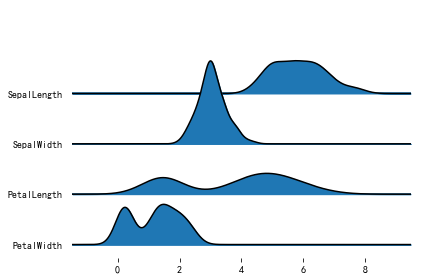

In [8]:
joypy.joyplot(iris);

如果传递分组的DF，或者将列名传递给by参数，则会获得分组列中每个值的密度图。

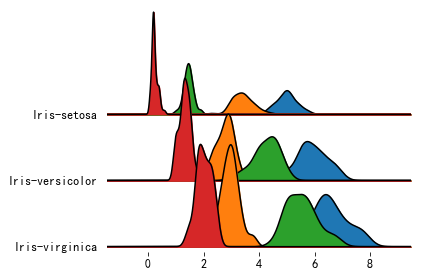

In [52]:
joypy.joyplot(iris
              #,column=['SepalLength','PetalLength']
              #,by="Species"
              #,xlabelsize=12
              #,ylabelsize=12
              #,ylim='own'
              #,grid=True
              #,fill=False
              #,hist=True
              #,yrot=30
              #,xrot=60
              #,fade=True
              #,overlap=1
              #,linecolor='b'
              #,background = 'grey'
              #,title='Joyplots of iris'
              #,colormap=plt.cm.rainbow
              );

### 4.认识所用数据集

In [13]:
#导入数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [14]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
df.shape

(234, 11)

In [16]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆类型"]

In [18]:
[*zip(df.columns,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆类型')]

### 5.绘制Joyplots

<Figure size 960x600 with 0 Axes>

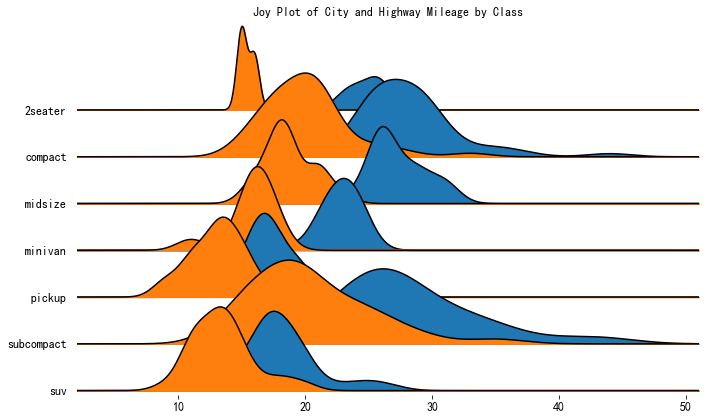

In [53]:
#创建画布
plt.figure(figsize=(16,10),dpi=60)
#绘制joyplot
fig, axes = joypy.joyplot(df,column=['hwy','cty'],by='class'
                          ,ylim='own'
                          ,figsize=(10,6)
                          ,xlabelsize=12
                          ,ylabelsize=12
                          ,title='Joy Plot of City and Highway Mileage by Class'
                         );

<Figure size 960x600 with 0 Axes>

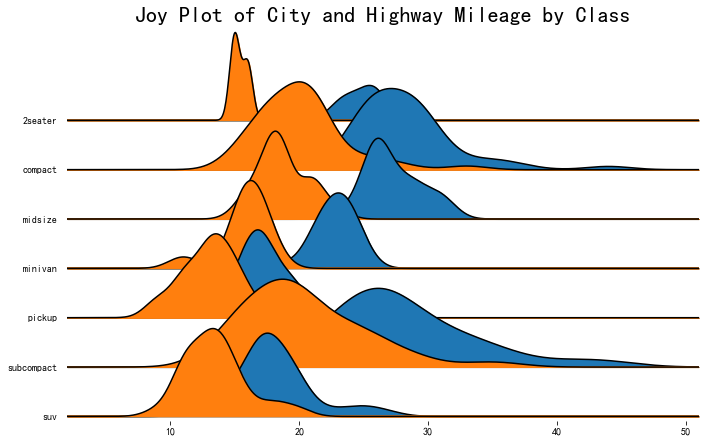

In [127]:
#源码
# Import Data
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 60)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(10,6))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

### 5. 图像解读

### <font color='bule'>25/50 分布式包点图（Distributed Dot Plot）

分布式包点图可以显示按组划分的点的分布情况。点的颜色越暗说明该区域的点集中度越高。通过对中位数进行不同着色，组的真实定位也会表达得更明显。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%88%86%E5%B8%83%E5%BC%8F%E5%8C%85%E7%82%B9%E5%9B%BE.png' width=600>

- 横坐标：城市里程
- 纵坐标：汽车制造商  
- 图例：每种汽车制造商所产汽车的城市里程中位数

#### 这个图里面所有的绘图元素我们都讲过了，所以这里就直接开始绘制图形啦

### 1.导入数据集并做简单数据处理

In [200]:
#导入数据集
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [201]:
df_raw.head() #这个数据集我们已经非常熟悉了

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [202]:
#给气缸数不同的车添加不同的颜色
cyl_colors = {4:'tab:cyan', 5:'tab:green', 6:'tab:olive', 8:'tab:brown'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

In [204]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cyl_color
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,tab:cyan
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,tab:cyan
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,tab:cyan
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,tab:cyan
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,tab:olive


In [207]:
#计算每一个汽车制造商的城市里程平均数
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True) #根据城市里程从大到小排序
df.reset_index(inplace=True)#重置排序后的索引

In [208]:
df

,manufacturer,cty
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


In [209]:
#计算每一个汽车制造商的城市里程中位数
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

In [210]:
df_median

,cty
manufacturer,
audi,17.5
chevrolet,15.0
dodge,13.0
ford,14.0
honda,24.0
hyundai,18.5
jeep,14.0
land rover,11.5
lincoln,11.0


### 2.绘制目标图形

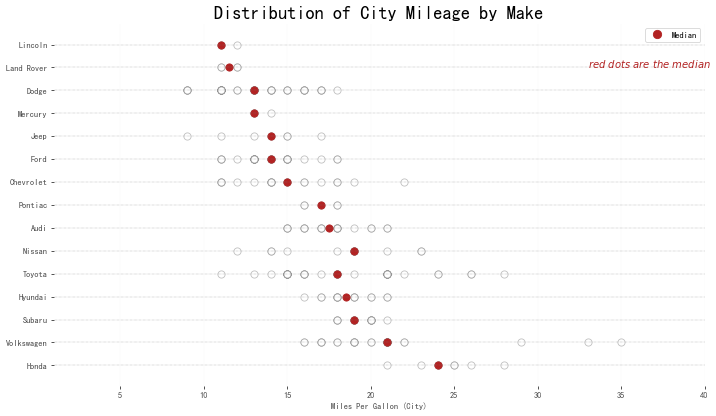

In [228]:
#创建画布
fig, ax = plt.subplots(figsize=(14,8), dpi= 60) #画布和子图分开
#根据每个制造商所产汽车的城市里程均值大小，绘制水平线图
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot') 

#绘制每个制造商所产汽车的城市里程散点图
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]   #提取出每个制造商的相关数据
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray',c='w' , alpha=0.5) #在一行中绘制出所有的城市里程数据点
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick') #绘制出每个制造商所产汽车的城市里程中位数
    
#添加文本说明
ax.text(33, 13, "$red\ dots\ are\ the\ median$", fontdict={'size':12}, color='firebrick') 

#去掉图形边框
plt.gca().spines["top"].set_visible(False)   
#plt.gca().spines["top"].set_alpha(0) 
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   

#添加装饰
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22}) #添加标题
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7) #设定X轴标题
plt.xticks(alpha=0.7)   #设定X轴刻度
ax.set_yticks(df.index) #设定Y轴刻度
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7) #设定Y轴标题
ax.set_xlim(1, 40)#设定X轴刻度范围
#添加图例
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
ax.legend(handles=red_patch)
plt.grid(axis='both', alpha=.4, linewidth=.1)#配置网格线
plt.show() #本地显示图像

In [213]:
[*enumerate(df.manufacturer)]

[(0, 'honda'),
 (1, 'volkswagen'),
 (2, 'subaru'),
 (3, 'hyundai'),
 (4, 'toyota'),
 (5, 'nissan'),
 (6, 'audi'),
 (7, 'pontiac'),
 (8, 'chevrolet'),
 (9, 'ford'),
 (10, 'jeep'),
 (11, 'mercury'),
 (12, 'dodge'),
 (13, 'land rover'),
 (14, 'lincoln')]

In [214]:
df_make = df_raw.loc[df_raw.manufacturer=='honda', :]
df_make

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cyl_color
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,tab:cyan
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,tab:cyan
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact,tab:cyan
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact,tab:cyan
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,tab:cyan
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,tab:cyan
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,tab:cyan
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,tab:cyan
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact,tab:cyan


In [218]:
np.repeat(0, df_make.shape[0]) #重复元素（把 0 重复df_make.shape[0]次）

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

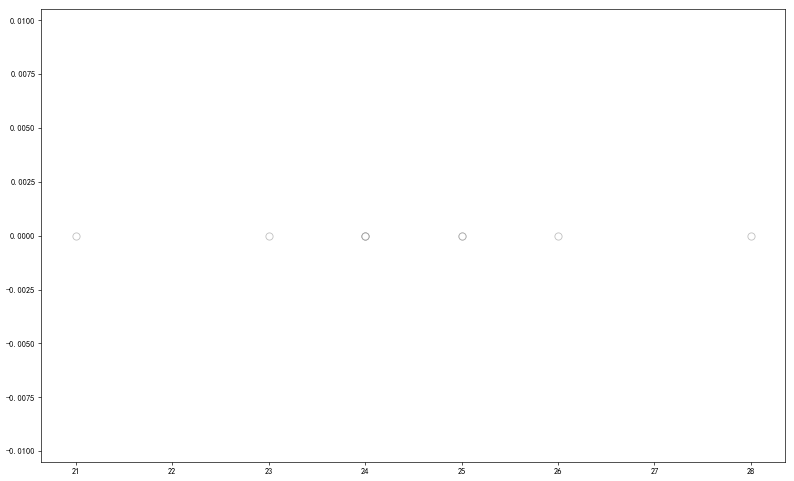

In [216]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 60)
ax.scatter(y=np.repeat(0, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray',c='w' , alpha=0.5)

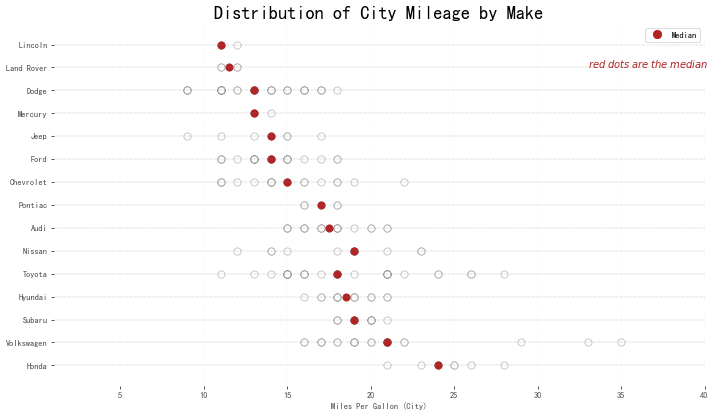

In [231]:
#源代码
# import matplotlib.patches as mpatches  #此处绘图中没用到

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'} #此图中未用到
# df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors) #此图中未用到

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(14,8), dpi= 60)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray',c='w' , alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')
# ax.text(33, 13, "$red\ dots\ are\ the\ median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

#### <font color='blue'>如果我们想根据气缸数的不同给包点着上不同颜色……

In [233]:
#导入数据集
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

#给气缸数不同的车添加不同的颜色
cyl_colors = {4:'tab:cyan', 5:'tab:green', 6:'tab:olive', 8:'tab:brown'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

#计算每一个汽车制造商的城市里程平均数
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True) #根据城市里程从大到小排序
df.reset_index(inplace=True)#重置排序后的索引

#计算每一个汽车制造商的城市里程中位数
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

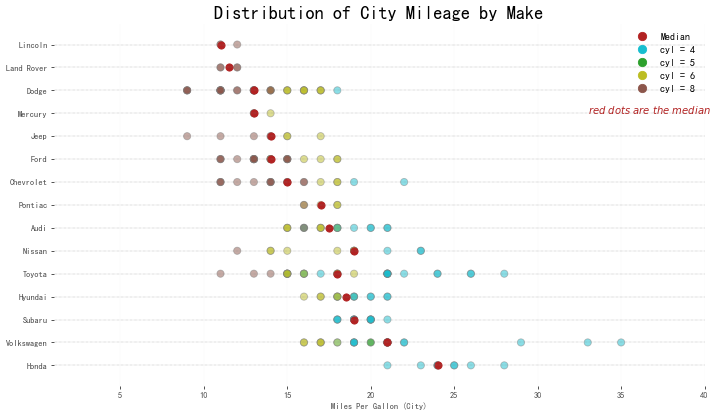

In [240]:
#创建画布
fig, ax = plt.subplots(figsize=(14,8), dpi= 60) #画布和子图分开
#根据每个制造商所产汽车的城市里程均值大小，绘制水平线图
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot') 

#绘制每个制造商所产汽车的城市里程散点图
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]   #提取出每个制造商的相关数据
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray'
               ,c=df_make['cyl_color'] , alpha=0.5) #在一行中绘制出所有的城市里程数据点
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick') #绘制出每个制造商所产汽车的城市里程中位数
    
#添加文本说明
ax.text(33, 11, "$red\ dots\ are\ the\ median$", fontdict={'size':12}, color='firebrick') 

#去掉图形边框
plt.gca().spines["top"].set_visible(False)   
#plt.gca().spines["top"].set_alpha(0) 
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   

#添加装饰
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22}) #添加标题
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7) #设定X轴标题
plt.xticks(alpha=0.7)   #设定X轴刻度
ax.set_yticks(df.index) #设定Y轴刻度
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7) #设定Y轴标题
ax.set_xlim(1, 40)#设定X轴刻度范围

#添加图例
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
patch1 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:cyan', label="cyl = 4")
patch2 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:green', label="cyl = 5")
patch3 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:olive', label="cyl = 6")
patch3 = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='tab:brown', label="cyl = 8")
ax.legend(fontsize=12,frameon=False)

plt.grid(axis='both', alpha=.4, linewidth=.1)#配置网格线
plt.show() #本地显示图像

### 3.图像解读